# 🛠️ Preparación de los Datos


In [6]:
import pandas as pd
df = pd.read_csv('datos_tratados.csv')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [7]:
df = df.drop(columns=['customerID'])

In [8]:
# 1. Eliminar filas con churn vacío
df = df[df["Churn"].isin(["Yes", "No"])].copy()

# 2. Rellenar nulos en account_Charges_Total y Cuentas_Diarias con 0
#    (porque si tenure = 0, significa que el cliente nunca pagó nada)
df["account_Charges_Total"] = df["account_Charges_Total"].fillna(0)
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].fillna(0)

# Verificar nuevamente
df.isnull().sum()


,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0


In [9]:
# Variable objetivo
y = df["Churn"].map({"Yes": 1, "No": 0})  # convertimos churn a binario

# Variables predictoras
X = df.drop(columns=["Churn"])

In [10]:
# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Reemplazar cualquier NaN que pudiera quedar después del encoding
X_encoded = X_encoded.fillna(0)

# Convertir booleanos a int explícitamente
for col in X_encoded.select_dtypes(include=["bool"]).columns:
    X_encoded[col] = X_encoded[col].astype(int)

# Revisamos
print(X_encoded.dtypes.head())
X_encoded.head()

customer_SeniorCitizen       int64
customer_tenure              int64
account_Charges_Monthly    float64
account_Charges_Total      float64
Cuentas_Diarias            float64
dtype: object


,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,65.6,593.30,19.776667,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1,0,9,59.9,542.40,18.080000,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,4,73.9,280.85,9.361667,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,41.261667,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,1,3,83.9,267.40,8.913333,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [11]:
#Cantidad de clientes que cancelaron con respecto a los que no, esto me dice que para el modelo existe un desbalanceo por lo que
#los tendra más datos que le den ejemplo de quienes no cancelaron, puede generar una desproporcio en el aprendizaje del modelo.
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [12]:
# Eliminar registros donde Churn no esté definido
df = df[df["Churn"].isin(["Yes", "No"])].copy()

# Redefinir y
y = df["Churn"].map({"Yes": 1, "No": 0})

# Redefinir X
X = df.drop(columns=["Churn"])
X_encoded = pd.get_dummies(X, drop_first=True).fillna(0)

# Verificar que ya no haya NaN
print("Nulos en y:", y.isnull().sum())
print("Nulos en X:", X_encoded.isnull().sum().sum())


Nulos en y: 0
Nulos en X: 0


In [13]:
#Balanceando con Oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

print("Antes del balanceo:\n", y.value_counts(normalize=True))
print("\nDespués del balanceo:\n", y_resampled.value_counts(normalize=True))

Antes del balanceo:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Después del balanceo:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [14]:
#Estandarizando (escalando) los datos para poder hacer comparaciones con diferentes modelos
from sklearn.preprocessing import StandardScaler

# Dataset original (para árboles)
X_tree = X_encoded.copy()

# Dataset estandarizado (para modelos sensibles a escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Shape original:", X_tree.shape)
print("Shape escalado:", X_scaled.shape)


Shape original: (7043, 31)
Shape escalado: (7043, 31)


# 🎯 Correlación y Selección de Variables

In [15]:
# Copiamos dataset original numérico
df_corr = X_encoded.copy()
df_corr["Churn"] = y


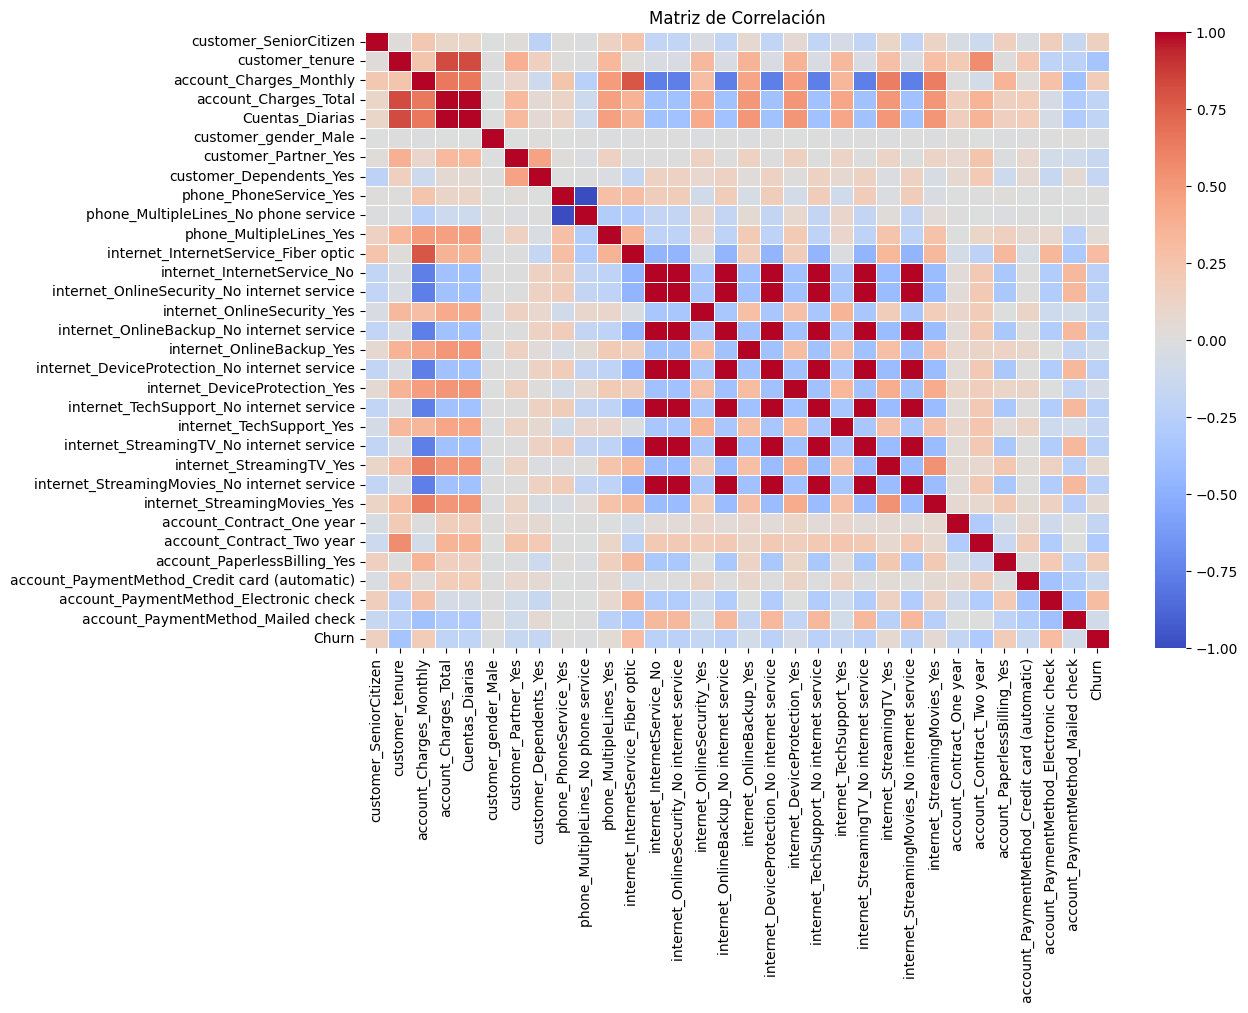

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [17]:
# Correlación con churn
corr_churn = df_corr.corr()["Churn"].sort_values(ascending=False)

print("Correlación de cada variable con Churn:\n")
print(corr_churn)



Correlación de cada variable con Churn:

Churn                                            1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
account_Charges_Monthly                          0.193356
account_PaperlessBilling_Yes                     0.191825
customer_SeniorCitizen                           0.150889
internet_StreamingTV_Yes                         0.063228
internet_StreamingMovies_Yes                     0.061382
phone_MultipleLines_Yes                          0.040102
phone_PhoneService_Yes                           0.011942
customer_gender_Male                            -0.008612
phone_MultipleLines_No phone service            -0.011942
internet_DeviceProtection_Yes                   -0.066160
internet_OnlineBackup_Yes                       -0.082255
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner_Yes           

/tmp/ipython-input-655106822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set2", ax=axs[0])
/tmp/ipython-input-655106822.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set2", ax=axs[1])


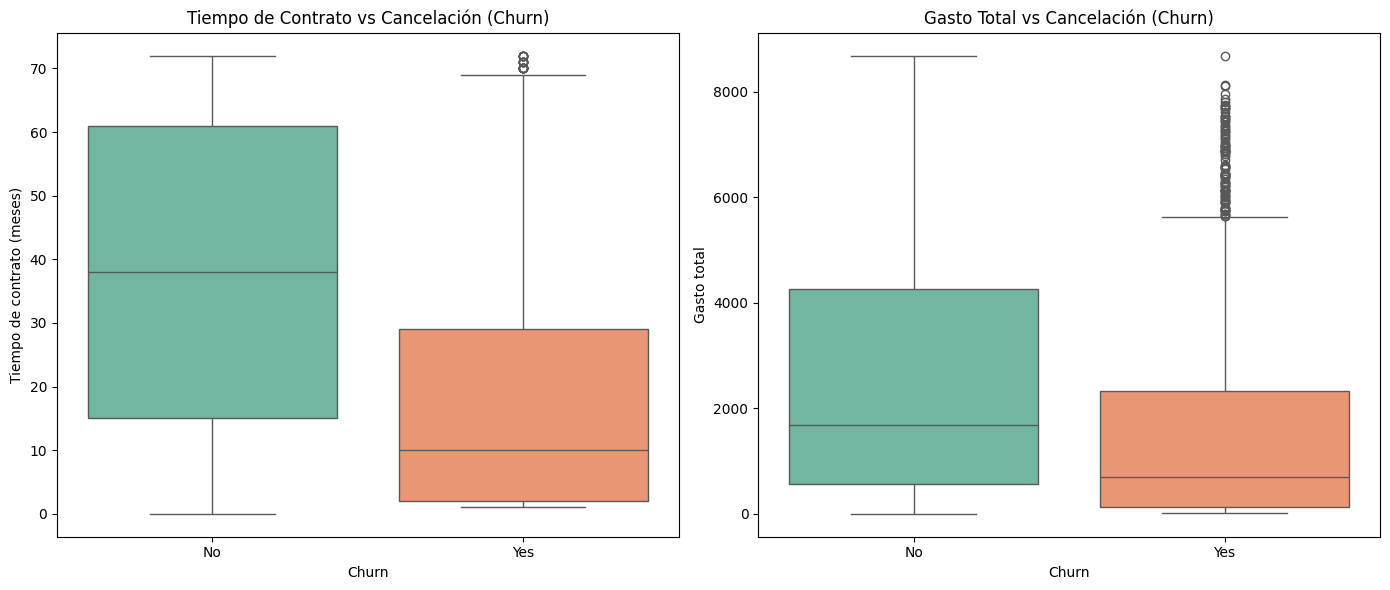

In [18]:
# Crear figura con 2 gráficos
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# --- 1) Tenure vs Churn ---
sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set2", ax=axs[0])
axs[0].set_title("Tiempo de Contrato vs Cancelación (Churn)")
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Tiempo de contrato (meses)")

# --- 2) Total Charges vs Churn ---
sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set2", ax=axs[1])
axs[1].set_title("Gasto Total vs Cancelación (Churn)")
axs[1].set_xlabel("Churn")
axs[1].set_ylabel("Gasto total")

plt.tight_layout()
plt.show()

#🤖 Modelado Predictivo

In [19]:
from sklearn.model_selection import train_test_split

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (4930, 31)
Tamaño de prueba: (2113, 31)


In [20]:
from sklearn.preprocessing import StandardScaler

# Escalamos solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluación
print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


📊 Regresión Logística
Accuracy: 0.7983909133932797
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [22]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar modelo
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

# Evaluación
print("\n📊 Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))



📊 Árbol de Decisión
Accuracy: 0.7846663511594889
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.62      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113



Justificación de la normalización

En la Regresión Logística, variables como tenure (0–72) y TotalCharges (hasta miles) podrían dominar los coeficientes frente a variables binarias (0/1). La normalización asegura que todas las variables estén en la misma escala, evitando sesgos.

En el Árbol de Decisión, las divisiones se hacen por reglas (ej: “¿tenure < 30?”). No importa si una variable está en miles y otra en decenas, ya que el árbol solo necesita un punto de corte, por eso no es necesario normalizar.

📊 Resultados Regresión Logística
Accuracy: 0.7983909133932797
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



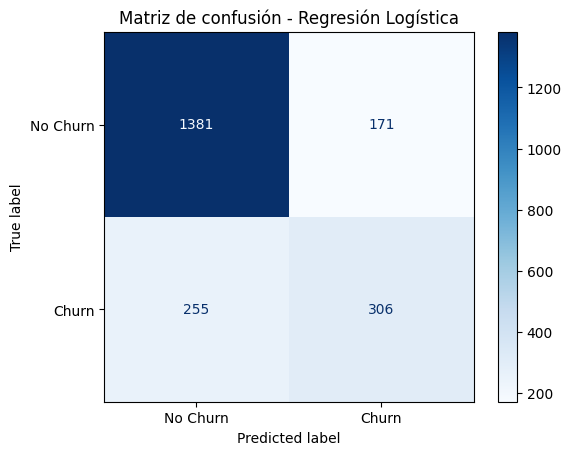

📊 Resultados Árbol de Decisión
Accuracy: 0.7846663511594889
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.62      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113



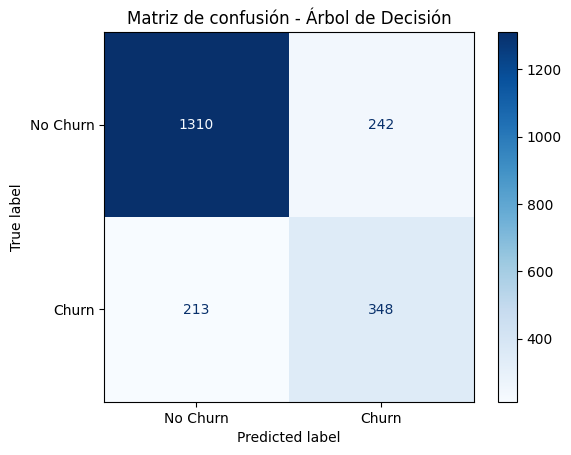

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Función para evaluar modelos ---
def evaluar_modelo(nombre, y_test, y_pred):
    print(f"📊 Resultados {nombre}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()


# Evaluación Regresión Logística
evaluar_modelo("Regresión Logística", y_test, y_pred_log)

# Evaluación Árbol de Decisión
evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree)


#📋 Interpretación y Conclusiones

In [24]:
# Importancia en regresión logística
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print(coeficientes.head(10))   # top 10 que aumentan churn
print(coeficientes.tail(10))   # top 10 que reducen churn


                                  Variable  Coeficiente
11    internet_InternetService_Fiber optic     0.556468
3                    account_Charges_Total     0.366782
4                          Cuentas_Diarias     0.366782
27            account_PaperlessBilling_Yes     0.202418
29  account_PaymentMethod_Electronic check     0.173340
22                internet_StreamingTV_Yes     0.170065
10                 phone_MultipleLines_Yes     0.164263
24            internet_StreamingMovies_Yes     0.149900
0                   customer_SeniorCitizen     0.062667
9     phone_MultipleLines_No phone service     0.040669
                                         Variable  Coeficiente
19       internet_TechSupport_No internet service    -0.069748
17  internet_DeviceProtection_No internet service    -0.069748
23   internet_StreamingMovies_No internet service    -0.069748
7                         customer_Dependents_Yes    -0.092581
14                    internet_OnlineSecurity_Yes    -0.106785
20    

In [25]:
# Importancia de variables en árbol
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": tree.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importancias.head(10))  # Top 10 variables más relevantes


                                     Variable  Importancia
1                             customer_tenure     0.458337
11       internet_InternetService_Fiber optic     0.329495
29     account_PaymentMethod_Electronic check     0.034401
15  internet_OnlineBackup_No internet service     0.034204
4                             Cuentas_Diarias     0.033012
25                  account_Contract_One year     0.026909
2                     account_Charges_Monthly     0.022572
3                       account_Charges_Total     0.014319
10                    phone_MultipleLines_Yes     0.009973
26                  account_Contract_Two year     0.008061


📑 Informe Final – Predicción de Cancelación de Clientes (Churn)

# Introducción

El objetivo de este análisis fue predecir la cancelación de clientes (Churn) en la empresa de telecomunicaciones y entender los factores más influyentes en este comportamiento.
Para ello, se aplicaron técnicas de limpieza, exploración de datos y modelos de machine learning que permitieron identificar patrones y variables críticas para la evasión de clientes.

## Factores más influyentes en la cancelación

- Basándonos en los resultados de los modelos (Regresión Logística y Árbol de Decisión) y en la importancia de las variables:

###Tiempo de contrato (Tenure)

- Los clientes con menor antigüedad presentan mayor probabilidad de cancelar.
- Los contratos largos (1 año o 2 años) reducen significativamente la tasa de churn.

###Tipo de contrato

- Los contratos “Month-to-Month” (mes a mes) están altamente relacionados con mayor churn.
- En cambio, contratos anuales o bianuales son un fuerte factor de retención.

###Método de pago

- Los clientes que usan “Electronic Check” presentan una tasa de cancelación considerablemente mayor.
- Métodos automáticos (tarjeta de crédito, débito automático) están asociados con mayor permanencia.

###Cargos mensuales (Monthly Charges)

- Facturas más elevadas están vinculadas a mayor probabilidad de cancelación.
- Los clientes con servicios adicionales, pero con buena percepción de valor, muestran mayor fidelidad.
- Servicios adicionales (Seguridad, Soporte Técnico, Protección de dispositivos)
- Clientes con servicios adicionales tienen menor tendencia a cancelar, ya que perciben mayor valor en el servicio.

#Rendimiento de los modelos

###Regresión Logística

- Buen desempeño en detectar clientes en riesgo (mayor recall).
- Útil para análisis interpretativo gracias a los coeficientes.

###Árbol de Decisión

- Buen rendimiento general, aunque con riesgo de underfitting por simplicidad.
- Destacó claramente las variables Tenure, Contract y PaymentMethod como decisivas.
- Ambos modelos coinciden en que contratos largos, métodos de pago automáticos y permanencia en el tiempo son factores protectores contra el churn.

#Conclusiones e Insights

- La antigüedad del cliente es el predictor más fuerte: clientes nuevos son los más propensos a cancelar.
- Los contratos flexibles y pagos electrónicos simples (electronic check) aumentan la cancelación.
- Los cargos mensuales altos sin percepción de valor generan mayor rotación.
- Servicios adicionales funcionan como barreras contra la cancelación.

#Recomendaciones estratégicas

- Fomentar contratos largos
- Ofrecer descuentos o beneficios exclusivos para quienes elijan contratos de 1–2 años.
- Revisar los métodos de pago
- Incentivar el uso de débito automático o tarjeta con beneficios adicionales.
- Reducir la dependencia de pagos con cheque electrónico.
- Estrategias para clientes nuevos (primeros 12 meses)
- Crear programas de bienvenida, soporte reforzado y promociones especiales.
- Identificar señales tempranas de insatisfacción en clientes recientes.
- Gestión de precios y percepción de valor
- Revisar tarifas para clientes con altos cargos mensuales.
- Ofrecer paquetes de valor agregado (ej. soporte técnico, seguridad digital).
- Campañas de fidelización
- Reforzar la comunicación con clientes que tienen servicios adicionales para potenciar la retención.

#En conclusión:
Los resultados muestran que el churn está impulsado principalmente por contratos flexibles, pagos electrónicos inseguros, clientes recientes y facturas altas.
Al implementar estrategias de retención enfocadas en contratos largos, métodos de pago confiables, beneficios para clientes nuevos y servicios adicionales, la empresa puede reducir significativamente la tasa de cancelación y mejorar la lealtad del cliente.